# Some simple plot exercise

We use the data available from the website [our world in data](https://ourworldindata.org/coronavirus-data-explorer) and try to explore plot functionalities using python libraries


    
    

In [74]:
# First: useful for analyzing datasets, read CSV, EXCEL,...
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 

# Prelimiaries

We read the file downloaded from the git repository into a `pandas` object. There are two datasets, 

- `full_data`: it contains, for each country, the numbers updated every dat
- `latest_data`: it contains only one entry per country, with latest data and general info

In [75]:
filepath = '/Users/caiazzo/HEDERA/CODES/python-seminar-elgouna/full_data.csv'
full_data = pd.read_csv(filepath)

# have a look at the structure
full_data.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
0,2020-02-24,Afghanistan,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
1,2020-02-25,Afghanistan,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
2,2020-02-26,Afghanistan,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
3,2020-02-27,Afghanistan,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,2020-02-28,Afghanistan,0.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN


For example, let's get only data relevant for germany:

In [76]:
# 
# filter the dataset according to location = "Germany"
germany = full_data.loc[ full_data['location']=="Germany"  ]

In [77]:
germany.head()

,date,location,new_cases,new_deaths,total_cases,total_deaths,weekly_cases,weekly_deaths,biweekly_cases,biweekly_deaths
27212,2020-01-27,Germany,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN
27213,2020-01-28,Germany,3.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN
27214,2020-01-29,Germany,0.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN
27215,2020-01-30,Germany,0.0,NaN,4.0,NaN,NaN,NaN,NaN,NaN
27216,2020-01-31,Germany,1.0,NaN,5.0,NaN,NaN,NaN,NaN,NaN


Read the `latest_data` set

In [78]:
filepath_latest_data = '/Users/caiazzo/HEDERA/CODES/python-seminar-elgouna/owid-covid-latest.xlsx'
latest_data = pd.read_excel(filepath_latest_data)

In [79]:
# Have a look
latest_data.head()

,iso_code,continent,location,last_updated_date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index
0,AFG,Asia,Afghanistan,2021-04-06,56779.0,62.0,56.429,2512.0,4.0,5.143,...,1803.987,NaN,597.029,9.59,NaN,NaN,37.746,0.50,64.83,0.511
1,OWID_AFR,NaN,Africa,2021-04-06,4289749.0,9576.0,12169.714,114319.0,236.0,259.571,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ALB,Europe,Albania,2021-04-06,126936.0,141.0,316.143,2283.0,9.0,8.000,...,11803.431,1.1,304.195,10.08,7.1,51.2,NaN,2.89,78.57,0.795
3,DZA,Africa,Algeria,2021-04-06,117879.0,140.0,116.857,3112.0,4.0,3.286,...,13913.839,0.5,278.364,6.73,0.7,30.4,83.741,1.90,76.88,0.748
4,AND,Europe,Andorra,2021-04-06,12328.0,42.0,54.857,117.0,0.0,0.286,...,NaN,NaN,109.135,7.97,29.0,37.8,NaN,NaN,83.73,0.868


Question: what is the continent of Germany?

In [80]:
selected = latest_data.loc[ latest_data['location']=="Germany"] 
# this is an object containing the index of the row and the value, 
# we have to convert it to array and the the first element
selected['continent']

72    Europe
Name: continent, dtype: object

In [81]:
# the values of the row
selected['continent'].values

array(['Europe'], dtype=object)

In [83]:
# the first element of the array:
selected['continent'].values[0]

'Europe'

Let's write a function that give us the continent for any country

In [89]:
# return a continent for a given country (string) and a given dataframe
def get_continent(country, data):
    selected = data.loc[ data['location']==country]
    continent = selected['continent'].values[0]
    return continent
    
# return the population (in Mio.) for a given country (string) and a given dataframe
def get_population(country, data):
    selected = data.loc[ data['location']==country]
    result = selected['population'].values[0]/1e6
    return result


# we can actually be even more general: name tells us which property we need
def get_property(country,data,name):
    selected = data.loc[ data['location']==country]
    result = selected[name].values[0]
    return result

Simple test:

In [90]:
get_continent(country="Colombia", data=latest_data)

'South America'

In [91]:
get_population(country="Colombia", data=latest_data)

50.882884

In [92]:
get_property(country="Colombia", data=latest_data,name="life_expectancy")

77.29

## Plotting some data

We want now to plot the number of cases over time for a given country, e.g., Germany

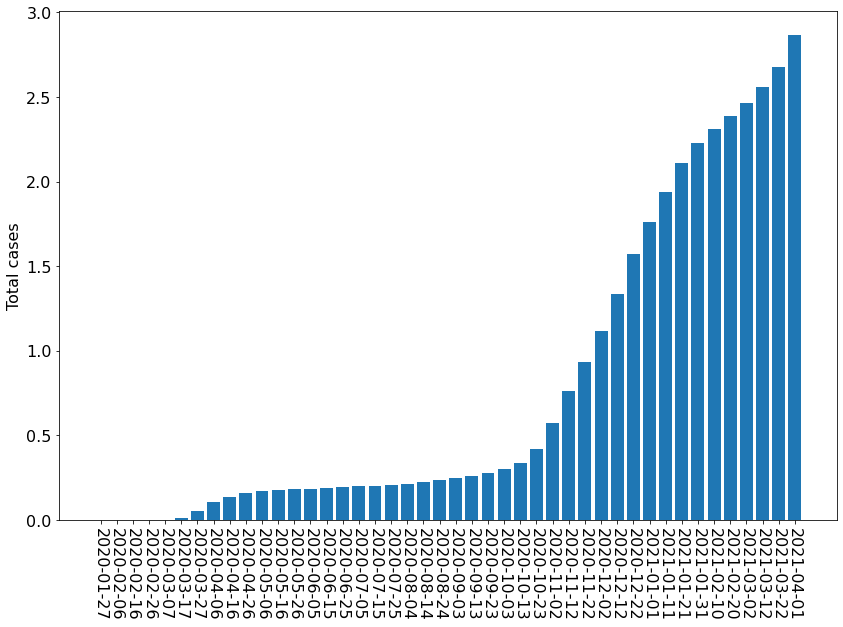

In [94]:
# select the data
germany = full_data.loc[full_data["location"]=="Germany"]

# create a figure
fig, ax = plt.subplots(figsize=(12,9))

# we have to sample (if we show all data, the plot get very full)
sampling = 10 #days

# create a barplot
plt.bar(germany['date'][0::sampling],germany['total_cases'][0::sampling]/1e6)

# y-label
plt.ylabel("Total cases")
# x-axis
plt.xticks(np.arange(len(de['date'][0::sampling])),de['date'][0::sampling].values,rotation = -90)

# some function to make it nicer
plt.tight_layout()
plt.show()


        


Let's now write it like a function



In [95]:
# sampling = 10 will set the default, if the argument is not used
def plot_data_of_country(country,data,sampling=10):
    # select the data (df = short for 'dataframe')
    df= data.loc[data["location"]==country]

    # create a figure
    fig, ax = plt.subplots(figsize=(12,9))
    # we have to sample (if we show all data, the plot get very full)
    sampling = 10 #days
    # create a barplot
    plt.bar(df['date'][0::sampling],df['total_cases'][0::sampling]/1e6)
    
    # y-label
    plt.ylabel("Total cases")
    # x-axis
    plt.xticks(np.arange(len(df['date'][0::sampling])),df['date'][0::sampling].values,rotation = -90)

    # some function to make it nicer
    plt.tight_layout()
    plt.show()

Test

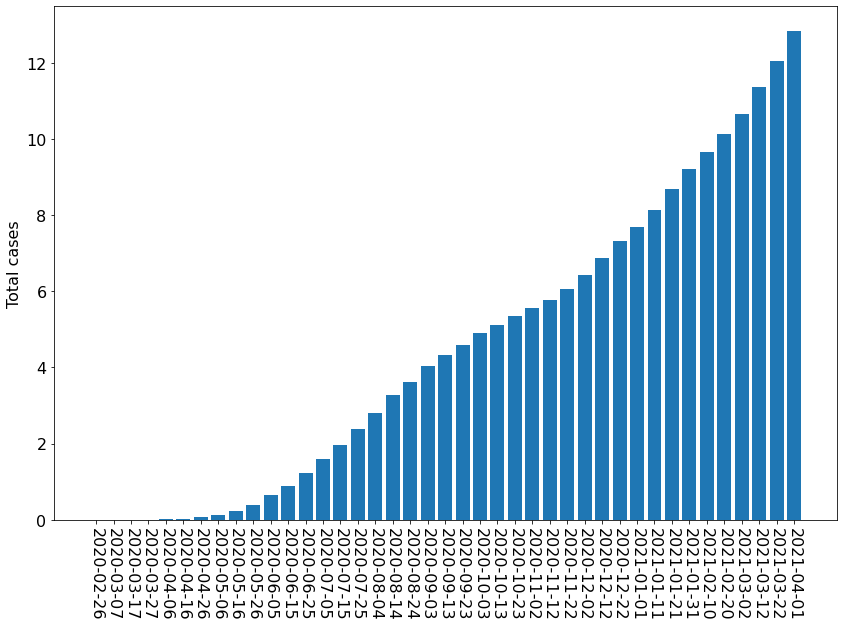

In [96]:
plot_data_of_country("Brazil",data=full_data)

## Incidence - Heatmap

Now we try to create a heatmap showing the evolution of *incidence* (no. of cases per week/100000 people) over time, for 
different countries.
We will use the `seaborn.heatmap` function. The documentation can be found [here](https://seaborn.pydata.org/generated/seaborn.heatmap.html)

In [104]:
# first, create some empty list that we will fill
all_data = []
y_axis_labels = []

# we will fix a number of days and plot the data only for these days (from today, backwards)
# moreover, there are sometimes different number of data per country, so, we need to check this when putting
# the data together
start_date = 200

# we can also decide - for better comparisons - to select only countries that have a certain population, or certain
# life expectancy
min_pop = 20
min_life_exp = 77




Idea:
    
- Loop over countries
- get relevant data
- compute population (and incidence), life expentancy (and, if needed any other property)
- if the conditions are satisfied (e.g., population large enough, if we have enough data, ..) then add the data to the list

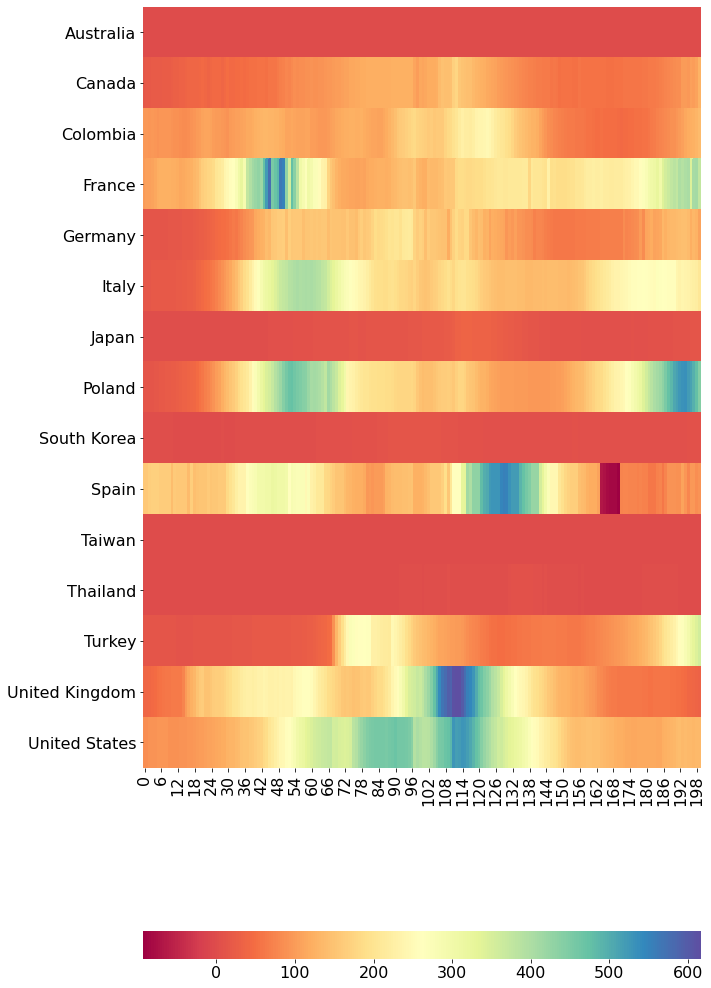

In [105]:
all_countries = np.unique(full_data['location'])
for a in all_countries:

    # compute cases and incidence (per Mio. people)
    country_df =  full_data.loc[full_data['location']==a]
    population = get_population(country=a,data=latest_data)
    life_exp = get_property(country=a,data=latest_data,name="life_expectancy")
    
    # compute incidence (per 100.000: we have to divide by 10 since population is in Millions.
    incidence = country_df['weekly_cases'].values/population/10
 
    if len(incidence)>start_date and life_exp>min_life_exp and population > min_pop:
        all_data.append(incidence[-start_date:])
        y_axis_labels.append(a)
        
data = np.array(all_data)
fig, ax = plt.subplots(figsize=(10,20))
ax = sns.heatmap(data, cbar_kws={"orientation": "horizontal"},
                 yticklabels=y_axis_labels,cmap="Spectral")
    
